This Python 3 environment comes with many helpful analytics libraries installed
It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Input data files are available in the read-only "../input/" directory
For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Preprocessing

In [4]:
#dropping customerId feature

data = data.drop('CustomerID', axis=1)

In [5]:
#labelencoding the categorical feature

data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [7]:
scaled_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


# Clustering

In [8]:
# using elbow method to choose the clusters

max_clusters = 50

In [9]:
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertia = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

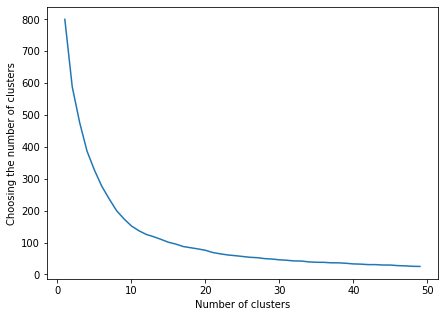

In [10]:
plt.figure(figsize=(7,5))
plt.plot(range(1, max_clusters), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Choosing the number of clusters')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [12]:
clusters = kmeans.predict(scaled_data)
clusters

array([2, 2, 0, 4, 0, 4, 0, 4, 3, 4, 3, 4, 0, 4, 0, 2, 0, 2, 3, 4, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 4, 3, 4, 3, 2, 0, 4, 0, 4, 0, 4, 6, 2, 3, 4,
       0, 4, 6, 7, 7, 7, 6, 2, 7, 3, 6, 3, 6, 3, 7, 3, 3, 2, 6, 6, 3, 2,
       6, 6, 2, 7, 3, 6, 6, 6, 3, 2, 6, 2, 7, 6, 3, 2, 3, 6, 7, 3, 6, 7,
       7, 6, 6, 2, 3, 7, 7, 2, 6, 7, 3, 2, 7, 6, 3, 2, 3, 7, 6, 3, 3, 3,
       3, 7, 7, 2, 7, 7, 6, 6, 6, 6, 2, 7, 7, 8, 7, 1, 5, 8, 3, 8, 5, 8,
       7, 1, 5, 1, 9, 8, 5, 1, 9, 8, 7, 1, 5, 8, 5, 1, 9, 8, 5, 8, 9, 1,
       9, 1, 5, 1, 5, 1, 6, 1, 5, 1, 5, 1, 5, 1, 9, 8, 5, 8, 5, 8, 9, 1,
       5, 8, 5, 8, 9, 1, 5, 1, 9, 8, 9, 8, 9, 1, 9, 1, 5, 1, 9, 1, 9, 8,
       5, 8], dtype=int32)

# Principle Components analysis

In [13]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data.values), columns=['PC1', 'PC2'])

In [14]:
reduced_data

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483
...,...,...
195,-1.179572,1.324568
196,0.672751,1.221061
197,-0.723719,2.765010
198,0.767096,2.861930


In [15]:
kmeans.cluster_centers_

array([[-0.7425083 ,  0.16967696, -1.31640908, -1.1668652 ],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 1.12815215, -0.97602698, -0.73705168,  0.41603773],
       [ 1.12815215,  1.43505777, -0.45298304, -0.40195247],
       [-0.88640526, -0.93245435, -1.29459798,  1.12360689],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526,  1.09830638, -0.24158313, -0.04807901],
       [-0.88640526, -0.7906297 , -0.09294256, -0.14202221],
       [ 1.12815215, -0.39989994,  1.01344075,  1.26040667],
       [-0.88640526,  0.35421988,  1.24912183, -1.14745442]])

In [16]:
reduced_centers = pca.transform(kmeans.cluster_centers_)

In [17]:
reduced_centers

array([[ 0.75229959, -1.61087948],
       [-1.38150389,  0.3644368 ],
       [-0.68838314,  0.28733559],
       [ 1.5303687 ,  0.17028966],
       [-1.61307574, -1.33371367],
       [ 1.19961046,  1.30582744],
       [ 0.58233488, -0.85939176],
       [-0.65343732, -0.55947734],
       [-0.88272588,  1.65431318],
       [ 0.81659377,  0.24505923]])

In [18]:
reduced_data['clusters'] = clusters

In [19]:
reduced_data

,PC1,PC2,clusters
0,-0.406383,-0.520714,2
1,-1.427673,-0.367310,2
2,0.050761,-1.894068,0
3,-1.694513,-1.631908,4
4,-0.313108,-1.810483,0
...,...,...,...
195,-1.179572,1.324568,1
196,0.672751,1.221061,9
197,-0.723719,2.765010,8
198,0.767096,2.861930,5


# Data visualization

<function matplotlib.pyplot.show(close=None, block=None)>

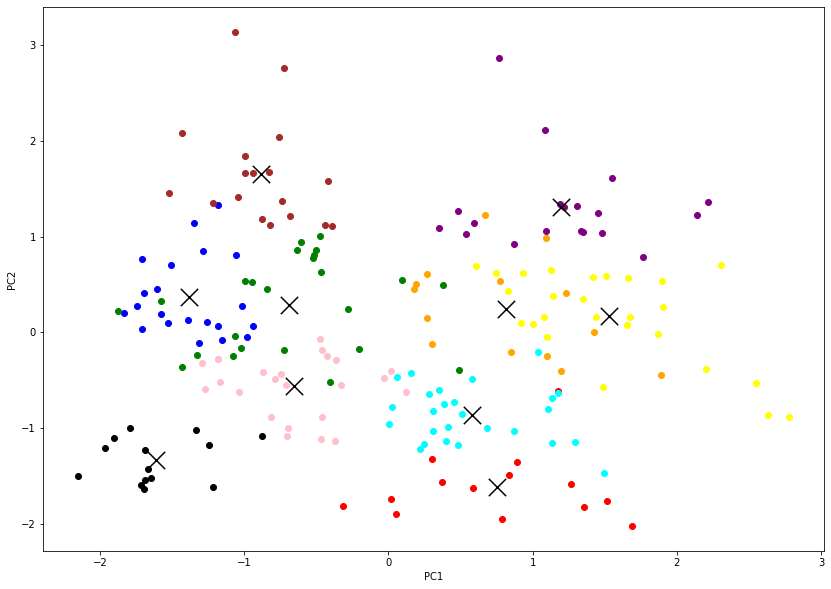

In [20]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_data[reduced_data['clusters'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['clusters'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['clusters'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 2].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['clusters'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 3].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['clusters'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 4].loc[:, 'PC2'], color='black')
plt.scatter(reduced_data[reduced_data['clusters'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 5].loc[:, 'PC2'], color='purple')
plt.scatter(reduced_data[reduced_data['clusters'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 6].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['clusters'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['clusters'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 8].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['clusters'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['clusters'] == 9].loc[:, 'PC2'], color='orange')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show